In [581]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from methods import datastorage


data = datastorage("JsonData")

In [582]:
DistrictCounter = {}
for restaurant in data:
    District = data[restaurant]["Location"]["District"]
    if District in DistrictCounter:
        DistrictCounter[District] += 1
    else:
        DistrictCounter[District] = 1

DistrictCounter = dict(sorted(DistrictCounter.items(), key=lambda item: item[1] ,reverse=True))

DistrictCounter['Total'] = 0
for District in DistrictCounter:
    if District != 'Total':
        DistrictCounter['Total'] += DistrictCounter[District]
        
DistrictCounter


{'Plaza de la Revolucion': 47,
 'Habana Vieja': 42,
 'Centro Habana': 31,
 'Playa': 30,
 'Habana del Este': 21,
 'Diez de Octubre': 15,
 'Boyeros': 15,
 'Marianao': 10,
 'Cerro': 10,
 'Guanabacoa': 10,
 'La Lisa': 10,
 'San Miguel del Padron': 10,
 'Arroyo Naranjo': 10,
 'Cotorro': 10,
 'Regla': 4,
 'Total': 275}

In [583]:
restlist  = []
proplist  = []
distlist  = []
prodlist  = []
typelist  = []
pricelist = []

veto = ["Appetizers", "Drinks", "Breakfast", "Additions", "Bread", "Desserts", "Additions", "Sides"]

for restaurant in data:
    menu = data[restaurant]["Menu"]
    for type in menu:
        if not(type in veto):        
            for product in menu[type]:
                restlist.append(data[restaurant]["Name"])
                proplist.append(data[restaurant]["Ownership"])
                distlist.append(data[restaurant]["Location"]["District"])
                prodlist.append(product)
                typelist.append(type)
                pricelist.append(menu[type][product])

df = pd.DataFrame({
    "Restaurant": restlist,
    "Ownership": proplist,
    "District": distlist,
    "Product": prodlist,
    "Type": typelist,
    "Price": pricelist
})

df

,Restaurant,Ownership,District,Product,Type,Price
0,Tropikana,Particular,Marianao,Bistec de pollo,Chicken,1000.0
1,Tropikana,Particular,Marianao,Pollo frito,Chicken,1000.0
2,Tropikana,Particular,Marianao,Pollo a la milanesa,Chicken,1500.0
3,Tropikana,Particular,Marianao,Bistec de cerdo,Pork,1300.0
4,Tropikana,Particular,Marianao,Bistec de cerdo a la milanesa,Pork,1800.0
...,...,...,...,...,...,...
5868,Rico Rico,Particular,Cerro,Pasta Carbonara,Pasta,1000.0
5869,Rico Rico,Particular,Cerro,Calzone Napoles,Pasta,1090.0
5870,Rico Rico,Particular,Cerro,Megacalzone,Pasta,1440.0
5871,Rico Rico,Particular,Cerro,lasagna Bolonnesa,Pasta,1550.0


In [584]:
distlist_nr = list(dict.fromkeys(distlist)) 
typelist_nr = list(dict.fromkeys(typelist))

distlist2 = []
typelist2 = []
medianlist  = []

for type in typelist_nr:
    for district in distlist_nr:
        df2 = df.loc[df['District'] == district].loc[df['Type'] == type]
        distlist2.append(district)
        typelist2.append(type)
        medianlist.append(df2['Price'].median())
        
df2 = pd.DataFrame({
    "District": distlist2,
    "Type": typelist2,
    "Median": medianlist
})

df2_pivot = df2.pivot(
    index="District",
    columns="Type",
    values="Median"
)
df2_pivot

Type,Beef,Chicken,Fishes,Other,Pasta,Pizza,Pork,Seafood
District,,,,,,,,
Arroyo Naranjo,1700.0,1475.0,1617.5,1500.0,1200.0,1400.0,1570.0,2200.0
Boyeros,2300.0,1700.0,2265.0,2180.0,1250.0,1260.0,1860.0,2500.0
Centro Habana,2600.0,1800.0,2662.5,1650.0,1550.0,1450.0,2000.0,2900.0
Cerro,NaN,1500.0,2870.5,1900.0,1000.0,990.0,1000.0,3176.0
Cotorro,1650.0,1100.0,1800.0,2300.0,900.0,975.0,1550.0,1900.0
Diez de Octubre,2500.0,1700.0,2595.0,2350.0,1150.0,1400.0,2000.0,2700.0
Guanabacoa,2300.0,2060.0,2485.0,1682.5,1100.0,1100.0,1450.0,2750.0
Habana Vieja,2400.0,2200.0,2500.0,2600.0,2000.0,1750.0,2250.0,2900.0
Habana del Este,2450.0,1650.0,2100.0,2300.0,1350.0,1625.0,1850.0,2595.0


<Axes: xlabel='Type', ylabel='District'>

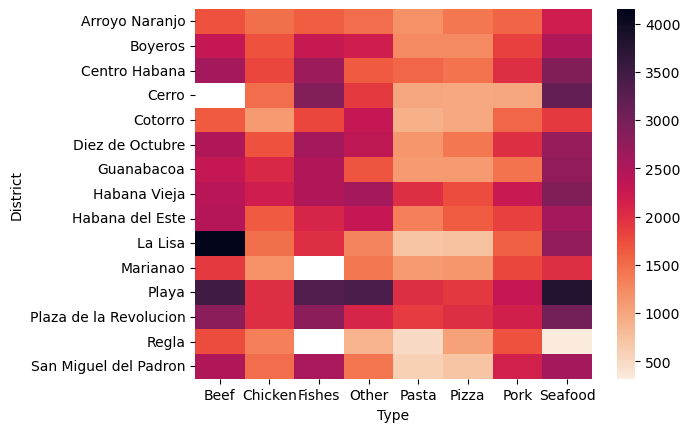

In [585]:
sns.heatmap(df2_pivot, cmap='rocket_r')